In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('../src')
from utils import load_data, save_processed_data
from cleaning import preprocess_data, handle_missing_values

In [2]:
df = load_data()

Successfully loaded data from ../data/raw/coffee_sales.csv
Shape: (181, 7)


In [3]:
df_clean = handle_missing_values(df)

df_processed, preprocessor = preprocess_data(df_clean)

print("=== ORIGINAL DATA ===")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

print("\n=== PROCESSED DATA ===")
print(f"Shape: {df_processed.shape}")
print(f"New columns: {list(df_processed.columns)}")
print(f"Date range: {df_processed['date'].min()} to {df_processed['date'].max()}")

=== ORIGINAL DATA ===
Shape: (181, 7)
Columns: ['date', 'day_of_week', 'is_weekend', 'is_holiday', 'average_temperature', 'marketing_spend', 'revenue']

=== PROCESSED DATA ===
Shape: (181, 9)
New columns: ['date', 'day_of_week', 'is_weekend', 'is_holiday', 'average_temperature', 'marketing_spend', 'revenue', 'month', 'day_of_month']
Date range: 2023-01-01 00:00:00 to 2023-06-30 00:00:00


Data saved to ../data/processed/coffee_sales_clean.csv

=== REVENUE DISTRIBUTION ===


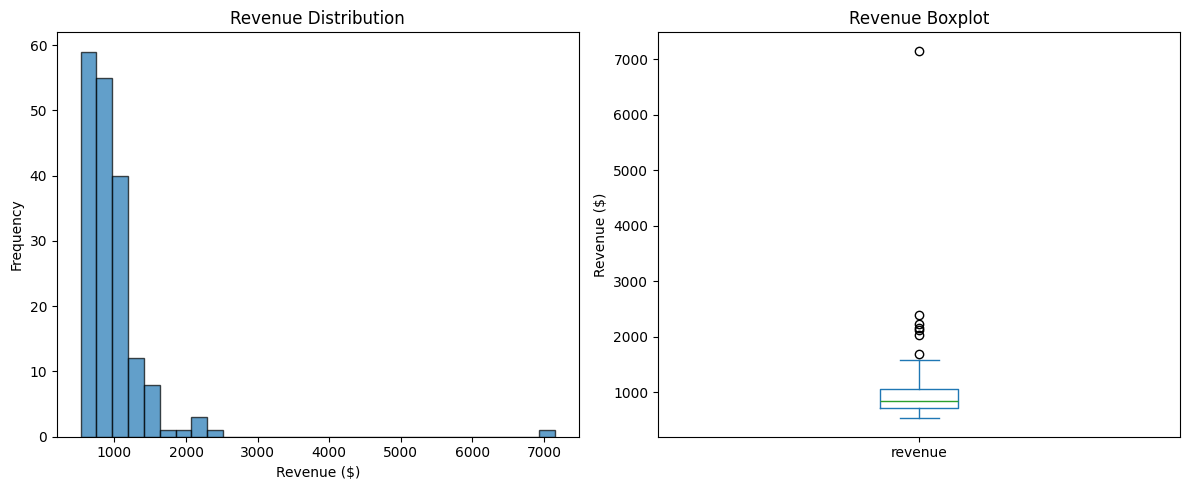

In [4]:
save_processed_data(df_processed, 'coffee_sales_clean.csv')

print("\n=== REVENUE DISTRIBUTION ===")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_processed['revenue'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Revenue Distribution')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df_processed['revenue'].plot(kind='box')
plt.title('Revenue Boxplot')
plt.ylabel('Revenue ($)')

plt.tight_layout()
plt.show()